Import libraries needed for this project.

In [1]:
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt 

# Reading two CSV files into Pandas DataFrames, ignoring memory-related warnings
# 'tmdb_5000_credits.csv' contains movie credits data
# 'tmdb_5000_movies.csv' contains movie details data
df1 = pd.read_csv('tmdb_5000_credits.csv', low_memory=False)  # Reading the first CSV file into df1
df2 = pd.read_csv('tmdb_5000_movies.csv', low_memory=False)   # Reading the second CSV file into df2

In [2]:
# Let's merge the two data frames
df1.columns = ['id','title','cast','crew']

merged_df = pd.merge(df1, df2, on='id', how='inner')

merged_df.head(1)

# Drop the 'title_x' column in order to only display one title column 
merged_df = merged_df.drop('title_x', axis=1)

merged_df.head(1)

,id,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
# Rename 'title_y' column to 'title' and 'homepage' column to 'website'
merged_df = merged_df.rename(columns={'title_y': 'title', 'homepage': 'website'})
merged_df.head(1)

,id,cast,crew,budget,genres,website,keywords,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0


Now that we've imported the necessary libraries, merged the two data frames, and cleaned some of the data, we can now get started on our visualizations 

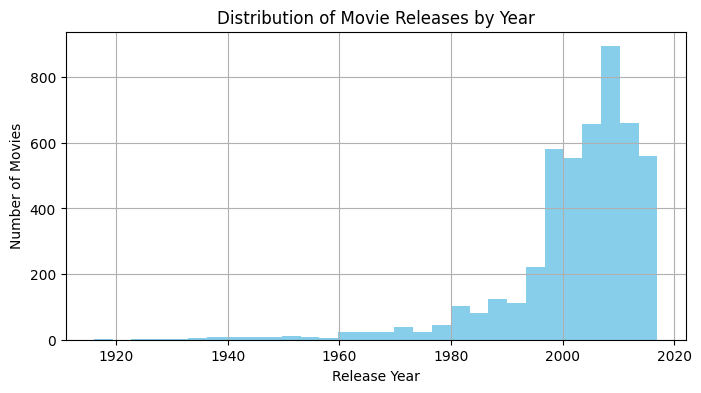

<module 'matplotlib.pyplot' from 'c:\\Users\\alexr\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>


In [7]:
# Chart displaying the distribution of movie releases by year
# Convert 'release_date' to datetime format if it's not already in datetime format
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Extracting the year from the release_date column
merged_df['release_year'] = merged_df['release_date'].dt.year


# Creating a histogram to visualize the distribution of movie releases by year
plt.figure(figsize=(8, 4))  # Setting the figure size
plt.hist(merged_df['release_year'], bins=30, color='skyblue')  # Creating a histogram with 30 bins and skyblue color
plt.xlabel('Release Year')  # Labeling the x-axis
plt.ylabel('Number of Movies')  # Labeling the y-axis
plt.title('Distribution of Movie Releases by Year')  # Setting the title of the plot
plt.grid(True)  # Displaying gridlines on the plot
plt.show()  # Showing the plot
print(plt)

Here we can see that many movies were produced around the 2010s.

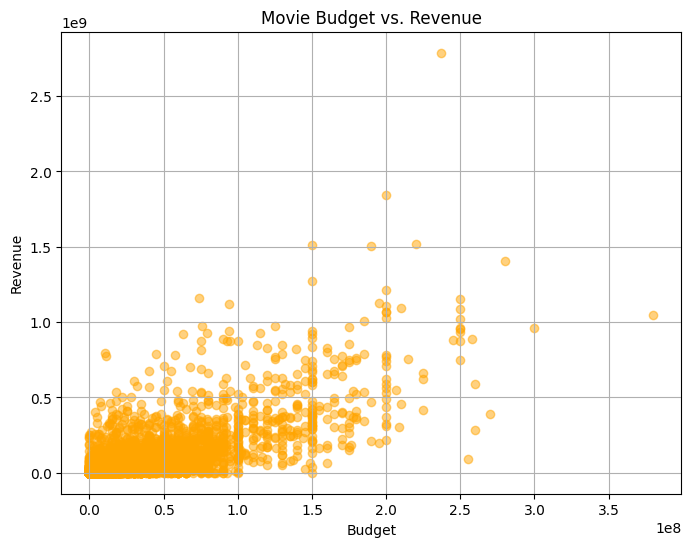

<module 'matplotlib.pyplot' from 'c:\\Users\\alexr\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>


In [8]:
# Creating a scatter plot using 'budget' as x-axis and 'revenue' as y-axis from the DataFrame 'df1'
# Creating a figure of size 8x6 inches
plt.figure(figsize=(8, 6))

# Setting the transparency (alpha) of the markers to 0.5 and color to purple
plt.scatter(merged_df['budget'], merged_df['revenue'], alpha=0.5, color='orange')

# Labeling the x and y axes
plt.xlabel('Budget')  # Label for the x-axis
plt.ylabel('Revenue')  # Label for the y-axis

# Setting the title of the plot
plt.title('Movie Budget vs. Revenue')

# Displaying the grid in the plot
plt.grid(True)

# Displaying the plot
plt.show()

# Printing the representation of the pyplot module
print(plt)

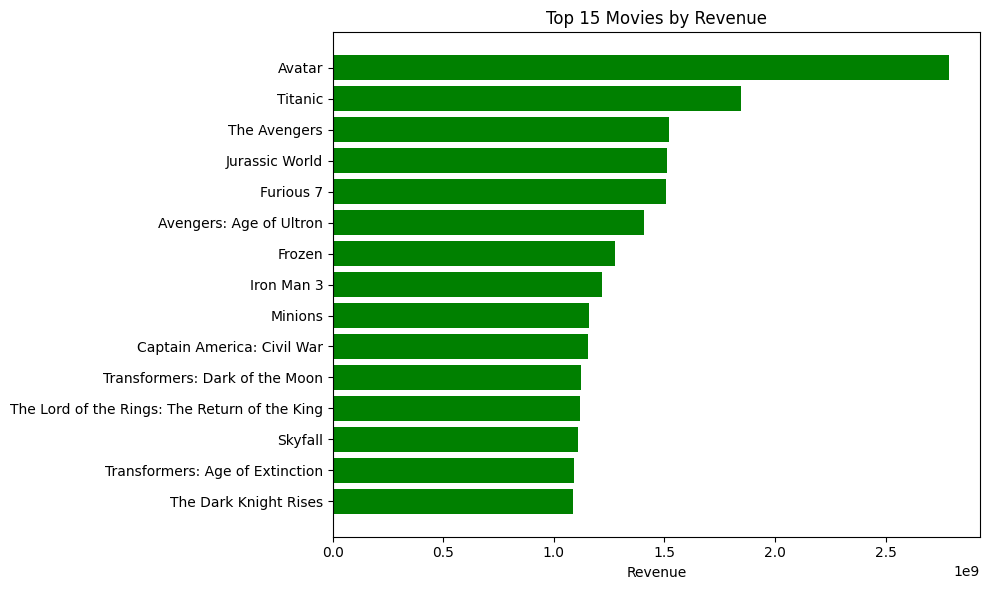

In [9]:
# Select the top 15 movies based on revenue
top_revenue_movies = merged_df.nlargest(15, 'revenue')

# Create a figure for the horizontal bar chart with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart showing movie titles on the y-axis and revenue on the x-axis, colored in green
plt.barh(top_revenue_movies['title'], top_revenue_movies['revenue'], color='green')

# Label the x-axis as 'Revenue'
plt.xlabel('Revenue')

# Set the title of the chart as 'Top 15 Movies by Revenue'
plt.title('Top 15 Movies by Revenue')

# Invert the y-axis to display the movies from top to bottom in descending order
plt.gca().invert_yaxis()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Display the bar chart
plt.show()

Avatar is the clear winner in terms of revenue brought in. 

 This next visualization will utilzie the merged data sets to showcase the number of movies each director has directed.

1. Parse the 'crew' column: Extract the directors from the 'crew' column.
2. Group by director: Count the occurrences of each director.
3. Plot a bar chart: Display the count of movies each director has directed.

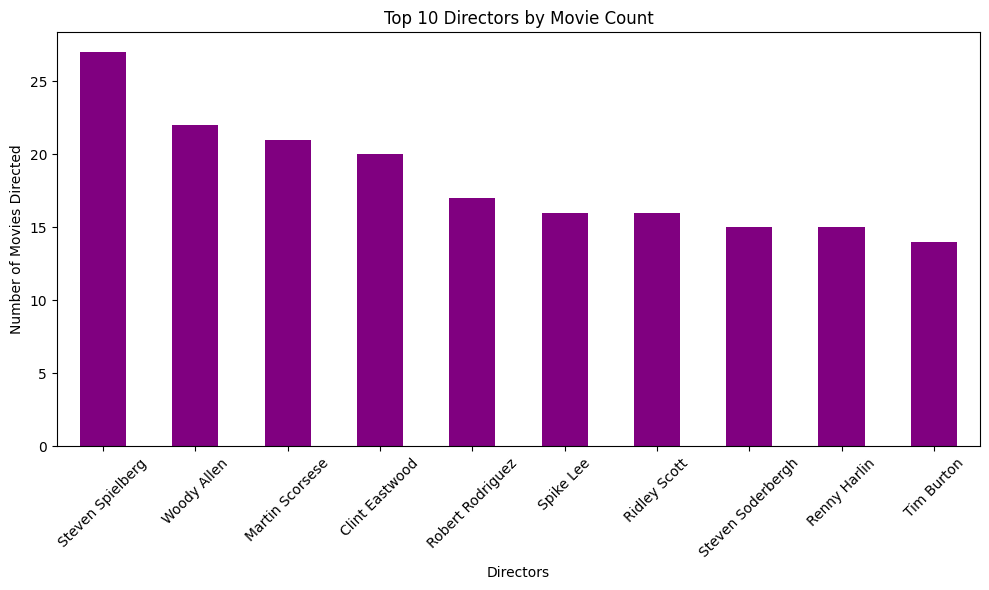

In [19]:
# Extracting directors' names from the 'crew' column based on the job 'Director'
directors = merged_df['crew'].apply(lambda x: [i['name'] for i in x if i['job'] == 'Director'])

# Explode the directors column
exploded_directors = pd.DataFrame({'director': [item for sublist in directors for item in sublist]})
# Create a DataFrame 'exploded_directors' with 'director' column containing all directors' names

director_counts = exploded_directors['director'].value_counts()
# Count the occurrences of each director's name and store in 'director_counts'

# Plotting the top 10 directors by movie count
top_directors = director_counts.head(10)
# Select the top 10 directors by movie count

top_directors.plot(kind='bar', figsize=(10, 6), color='purple')
# Plot a bar chart with top 10 directors and set figure size and color

plt.xlabel('Directors')
# Set label for x-axis

plt.ylabel('Number of Movies Directed')
# Set label for y-axis

plt.title('Top 10 Directors by Movie Count')
# Set the title of the plot

plt.xticks(rotation=45)
# Rotate x-axis labels for better readability

plt.tight_layout()
# Adjust layout to prevent overlapping

plt.show()
# Display the bar chart

Steven Spielberg is the champion in terms of most movies directed.